## Analytic Report project

### Import

In [24]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

## Load Data

In [25]:
df = pd.read_excel("Cardiology.xls", skiprows=[1, 2])
df.head()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [26]:
df.shape

(303, 14)

In [27]:
#df.describe()

## 1.	How does blood pressure and cholesterol relate to each other?

In [28]:
print("Mức độ kiểm định tương quan giữa blood pressure và cholesterol: %.7f" %(df["blood pressure"].corr(df["cholesterol"])))

Mức độ kiểm định tương quan giữa blood pressure và cholesterol: 0.1231742


** Nhận xét: **    

Hệ số kiểm định tương quan giữa hai cột xấp xỉ 0.123.

Do đó ta kết luận blood pressure và cholesterol mức độ tương quan thấp.

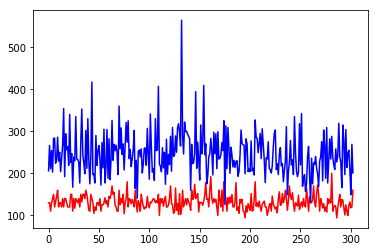

In [29]:
a = df["blood pressure"]
b = df["cholesterol"]

plt.plot(a, "red")
plt.plot(b, "blue")
plt.show()

## 2.	Do men tend to have higher blood pressure than women? What about cholesterol?

### 2.1 Blood pressure:
* ***Null hypothesis:***  Men don't tend to have higher blood pressure than women.
* ***Alternative hypothesis:*** Men tend to have higher blood pressure than women.

In [30]:
male = df[df['sex']== 1]     # Null hypothesis
female = df[df['sex']== 0]   # Alternative hypothesis

ttest_ind(male['blood pressure'], female['blood pressure'])

Ttest_indResult(statistic=-0.98649315362083601, pvalue=0.3246834797221041)

**p-value **$\approx  0.325 > 0.10$.Non-significant evidence against null hypothesis.

**Conclusion: And so, Can't determine that Men tend to have higher blood pressure than women.**

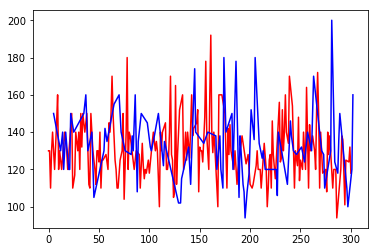

In [31]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

plt.plot(male["blood pressure"], "red")
plt.plot(female["blood pressure"], "blue")
plt.show()

### 2.2 Cholesterol:
* ***Null hypothesis:*** Men don't tend to have higher cholesterol than women.
* ***Alternative hypothesis:*** Men tend to have higher cholesterol than women.

In [32]:
female = df[df['sex']== 0]   # Null hypothesis
male = df[df['sex']== 1]     # Alternative hypothesis


ttest_ind(male['cholesterol'], female['cholesterol'])

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.00052996661062266396)

**p-value **$\approx  0.0005 < 0.01 \ \ \ \Rightarrow $ highly significant evidence against null-hypothesis. 

**Conclusion: Men tend to have higher cholesterol than women.**

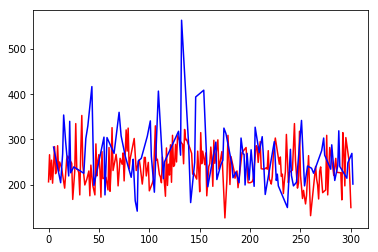

In [33]:
male = df[df['sex']== 1]
female = df[df['sex']== 0]

plt.plot(male["cholesterol"], "red")
plt.plot(female["cholesterol"], "blue")
plt.show()

## 3.	What contribute to causing heart disease (age, cholesterol, blood pressure)?  Is it the effect the same for both sex (male and female)?

### 3.1 Age cause heart disease?

* **Null hypothesis: ** Age doesn't cause heart disease.
* **Alternative hypothesis: ** Age causes heart disease.

In [34]:
non_heart_disease = df['age'][df['class']== 0]   # Null hypothesis
heart_disease = df['age'][df['class']== 1]       # Alternative hypothesis

ttest_ind(non_heart_disease, heart_disease)

Ttest_indResult(statistic=4.014560975148874, pvalue=7.5248013034423728e-05)

**Remark: **  $pvalue \approx 0.000007525 < 0.10  \Rightarrow \ \ \ $ Highly significant evidence against null hypothesis.

**Conclusion:  Age cause heart disease. **

### Compare the effect the same for male and female

* ***For male:*** 
    * ***Null hypothesis:*** Age don't cause heart disease for male.
    * ***Alternative hypothesis:*** Age causes heart disease for male.
    
* ***For female:*** 
    * ***Null hypothesis:*** Age don't cause heart disease for female.
    * ***Alternative hypothesis:*** Age causes heart disease for female.

In [35]:
# For male:
male_non_heart_disease = df['age'][df['sex']==1][df['class']== 0]   # Null hypothesis
male_heart_disease = df['age'][df['sex']==1][df['class']== 1]       # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, age cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
female_non_heart_disease = df['age'][df['sex']==0][df['class']== 0]   # Null hypothesis
female_heart_disease = df['age'][df['sex']==0][df['class']== 1]       # Alternative hypothesis

stat, p_value = ttest_ind(female_heart_disease, female_non_heart_disease)
print("For female, age cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, age cause heart disease?
      p-value = 0.0000210
For female, age cause heart disease?
      p-value = 0.0424696


**Remark: ** 

* For male, ${pvalue}_{ male} \approx 0.0000210 \ \ \ < 0.01 \ \ \ \Rightarrow$. Highly significant evidence against null hypothesis. 
* For female, ${pvalue}_{ female} \approx 0.0424696  \ \ \ (0.01 < {pvalue}_{ female} \le 0.05)$. Significant evidence against null hypothesis. 

**Conclusion: ** And so, Age causes heart disease for both male and female.

### 3.2 Cholesterol cause heart disease?

* **Null hypothesis: ** Cholesterol don't cause heart disease.
* **Alternative hypothesis: ** Cholesterol cause heart disease.

In [36]:
non_heart_disease = df['cholesterol'][df['class']== 0]  # Null hypothesis
heart_disease = df['cholesterol'][df['class']== 1]      # Alternative hypothesis

ttest_ind(heart_disease, non_heart_disease)

Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638)

$pvalue \approx 0.14 > 0.10  \Rightarrow \ \ \ $ Non-significant evidence against null hypothesis.

**Conclusion: ** Non-significant evidence to conclude that Cholesterol cause heart disease.

### Compare the effect the same for male and female

* ***For male:*** 
    * ***Null hypothesis:*** Cholesterol  don't cause heart disease for male.
    * ***Alternative hypothesis:*** Cholesterol causes heart disease for male.
    
* ***For female:*** 
    * ***Null hypothesis:*** Cholesterol  don't cause heart disease for female.
    * ***Alternative hypothesis:*** Cholesterol causes heart disease for female.

In [37]:
# For male:
male_non_heart_disease = df['cholesterol'][df['sex']==1][df['class']== 0]       # Null hypothesis
male_heart_disease = df['cholesterol'][df['sex']==1][df['class']== 1]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, cholesterol cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
female_non_heart_disease = df['cholesterol'][df['sex']==0][df['class']== 0]       # Null hypothesis
female_heart_disease = df['cholesterol'][df['sex']==0][df['class']== 1]   # Alternative hypothesis

stat, p_value = ttest_ind(female_heart_disease, female_non_heart_disease)
print("For female, cholesterol cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, cholesterol cause heart disease?
      p-value = 0.0113481
For female, cholesterol cause heart disease?
      p-value = 0.2372595


**Remark: ** 

* For male, ${pvalue}_{ male} \approx 0.0113 \ \ \ \ (0.01 < {pvalue}_{ male} \le 0.05) \ \ \ \Rightarrow$. Significant evidence against null hypothesis.
* For female, ${pvalue}_{ female} \approx 0.2373  > 0.10$. Non-significant evidence against null hypothesis.

**Conclusion: ** And so Cholesterol causes heart disease for male but not female.

### 3.3 Blood pressure cause heart disease?

* **Null hypothesis: **  Blood pressure don't cause heart disease.
* **Alternative hypothesis: **  Blood pressure cause heart disease.

In [38]:
non_heart_disease = df['blood pressure'][df['class']== 0]         # Null hypothesis
heart_disease = df['blood pressure'][df['class']== 1]     # Alternative hypothesis

ttest_ind(heart_disease, non_heart_disease)

Ttest_indResult(statistic=-2.5412927171039001, pvalue=0.011546059200233312)

$pvalue \approx 0.0115  \ \ \ (0.01 < pvalue < 0.05) \Rightarrow \ \ \ $ Significant evidence against null hypothesis.

**Conclusion:  Blood pressure cause heart disease.**

### Compare the effect the same for male and female

* ***For male:*** 
    * ***Null hypothesis:*** Blood pressure  don't cause heart disease for male.
    * ***Alternative hypothesis:*** Blood pressure causes heart disease for male.
    
* ***For female:*** 
    * ***Null hypothesis:*** Blood pressure  don't cause heart disease for female.
    * ***Alternative hypothesis:*** Blood pressure causes heart disease for female.

In [39]:
# For male:
male_non_heart_disease = df['blood pressure'][df['sex']==1][df['class']== 0]       # Null hypothesis
male_heart_disease = df['blood pressure'][df['sex']==1][df['class']== 1]   # Alternative hypothesis

stat, p_value = ttest_ind(male_heart_disease, male_non_heart_disease)
print("For male, blood pressure cause heart disease?")
print('      p-value = %.7f' %(p_value))

# For female:
female_non_heart_disease = df['blood pressure'][df['sex']==0][df['class']== 0]       # Null hypothesis
female_heart_disease = df['blood pressure'][df['sex']==0][df['class']== 1]   # Alternative hypothesis

stat, p_value = ttest_ind(female_heart_disease, female_non_heart_disease)
print("For female, blood pressure cause heart disease?")
print('      p-value = %.7f' %(p_value))

For male, blood pressure cause heart disease?
      p-value = 0.3484860
For female, blood pressure cause heart disease?
      p-value = 0.0000784


**Remark: ** 

* For male, ${pvalue}_{ male} \approx 0.3484860 > 0.10 \ \ \ $. Non-significant evidence against null hypothesis.
* For female, ${pvalue}_{ female} \approx 0.0000784  < 0.01  \ \ \ $. High significant evidence against null hypothesis

**Conclusion: ** Finally, Blood pressure causes heart disease for female but not male.

## Conclusion

1. Do đó ta kết luận blood pressure và cholesterol mức độ tương quan thấp.

2. Men tend to have higher cholesterol than women.

   Can't determine that Men tend to have higher blood pressure than women.
   
3. Age cause heart disease both male and female.

   Cholesterol causes heart disease for male but not female.
   
   Blood pressure causes heart disease for female but not male.